# Описание проекта 
Компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки.  
Нужно определить какие самолеты использует компания и с какой инстенсивностью. Как распределены рейсы по городам России и определить ТОП-10 городов по количеству принемаемых рейсов.

## Описание данных
**База данных об авиаперевозках в сентябре 2018 года (query_1.csv)**   
- `model` — модели самолетов
- `flights_amount` — количество рейсов для каждой модели самолетов  

**База данных среднем количестве рейсов, прибывающих в город за день в августе 2018 года (query_3.csv)** 
- `city` — города
- `average_flights` — среднее количество рейсов, прибывающих в город за день

### Задания по проекту для предоставленных данных 
#### Провести проверку данных:
- Импортировать файлы;
- Изучить данные в них;
- Проверить типы данных на корректность;

#### Провести исследовательский анализ 
- Выбрать топ-10 городов по количеству рейсов
- Построить графики: 
    - Модели самолетов и количество рейсов
    - Города и количество рейсов
    - Топ-10 городов и количество рейсов
- Сделать выводы по каждому из графиков, пояснить результат.

## Содержание проекта
### [База данных об авиаперевозках за сентябрь 2018 г.](#data_fly)
- #### [Результаты осмотра данных](#data_fly_look)
- #### [Построение графика "количество рейсов / модель самолета"](#data_fly_plt)
- #### [Анализ графика](#analys_fly_plt)
- #### [Проверка выводов по графику "количество рейсов / модель самолета"](#chek_fly_plt)
- #### [Итоговые выводы по данным об авиаперевозках](#data_fly_final)

### [База данных о среднем количестве рейсов в день, прибывающих в город  за август 2018 г.](#data_city)
- #### [Результаты осмотра данных](#data_city_look)
- #### [Подготовка данных для анализа](#data_city_prep)
- #### [Графики количества рейсов прибывающих в город](#data_city_plt)
    - [Анализ графиков](#analys_city_plt)
- #### [Графики ТОП-10 городов по количеству прибывающих рейсов](#top_city_plt)
    - [Анализ графиков](#analys_top_city_plt)
- #### [Итоговые выводы по данным о рейсах](#data_city_final)
    
### [Заключение](#analys_end)


In [1]:
# загружаем нужные библиотеки для обработки данных

import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import display_html

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### База данных об авиаперевозках за сентябрь 2018 г.<a name="data_fly"></a>

In [2]:
df_fly = pd.read_csv('/datasets/query_1.csv') #загружаем данные
df_fly  # проверка

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df_fly.shape

(8, 2)

In [4]:
df_fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


#### Результаты осмотра данных <a name="data_fly_look"></a>

Данные перелетов приведены на сентябрь 2018 года. База - 8 записей в 2 столбцах. 
- `model` — модели самолетов
- `flights_amount` — количество рейсов для каждой модели самолетов

Дубликатов и пропусков явно нет, типы данных не требуют дополнительной обработки.

#### Построение графика <a name="data_fly_plt"></a>

Построим график количества рейсов для каждой модели самолета (сентябрь 2018 г.)

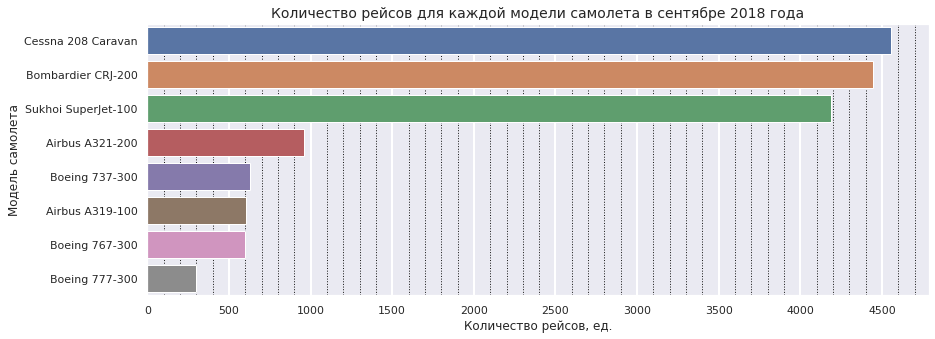

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='flights_amount', y='model', data=df_fly.sort_values(
                 by='flights_amount', ascending=False))
ax.set_title('Количество рейсов для каждой модели самолета в сентябре 2018 года',
             fontdict={'size': 14})
ax.set(ylabel='Модель самолета')
ax.set(xlabel='Количество рейсов, ед.')

# Определяем внешний вид линий основной и вспомогательной сетки:
ax.minorticks_on()
ax.grid(which='major', axis='x', linewidth=2)
ax.grid(which='minor', axis='x', color='k', linestyle=':')
# Устанавливаем шаг сетки
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

#### Анализ графика <a name="analys_fly_plt"></a>
Судя по графику в компании F9 два больших направления деятельности (если конечно можно так апроксимировать по данным за один месяц, но вряд ли это исключение из общей картины):
- Бизнес перелеты
- Гражданская авиация

Судя по моделям и количеству рейсов, компания "F9" работает **преимущественно на рейсах средней дальности**.

#### Проверка выводов по графику <a name="chek_fly_plt"></a>
Проверим эти предположения - соберем информацию по характеристикам самолетов (открытые источники), проанализируем количество полетов на "бизнес-джетах" и гражданской авиации.

**База с информацией о паспортной дальности полета самолета по моделям**   
(https://pikabu.ru/story/dalnost_poleta_passazhirskikh_samoletov_6414998) *не получилось спарсить с сайта - запрет стоит как я понял*

In [6]:
flying_range = {'model': pd.Series(df_fly.model.tolist()), 
                'flying_range': [6850, 5950, 4176, 9700, 11135, 3045, 1797, 3048]}

df_flying_range = pd.DataFrame(flying_range)
df_flying_range

,model,flying_range
0,Airbus A319-100,6850
1,Airbus A321-200,5950
2,Boeing 737-300,4176
3,Boeing 767-300,9700
4,Boeing 777-300,11135
5,Bombardier CRJ-200,3045
6,Cessna 208 Caravan,1797
7,Sukhoi SuperJet-100,3048


Для наглядности выведем две таблицы.  

In [7]:
# расположение итоговых таблиц слева направо для лучше визуализации

df1_styler = df_fly.style.set_table_attributes(
    "style='display:inline'").set_caption('Количество рейсов в сентябре 2018 г')
df2_styler = df_flying_range.style.set_table_attributes(
    "style='display:inline'").set_caption('Дальность полета для каждой модели самолета')

display_html(df1_styler._repr_html_() + ' -|- ' + df2_styler._repr_html_(), raw=True)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185
,model,flying_range
0,Airbus A319-100,6850


В зависимости от дальности полетасамолеты делятся на категории:
- Самолеты для местных авиалиний – до 1000 километров.
- Ближнемагистральные – дальность от 1 до 2,5 тысяч километров.
- Среднемагистральные – дальность от 2,5 до 6 тысяч километров.
- Дальнемагистральные – более 6 тысяч километров

По таблицам видно что:
- меньше всего рейсов у самолетов "гражданской дальней авиации" - `Boeing 767-300` - 600 рейсов и `Boeing 777-300` - 300 рейсов
- из "гражданской авиации" больше всего рейсов `Sukhoi SuperJet-100` - 4185 рейсов. Т.е. большинство рейсов выполняется на "средние" расстояния. Компания F9 сделала ставку на `Sukhoi SuperJet-100`, что говорит скорее о лобистских решениях, чем об экономически оправданных, учитывая непростую судьбу самолета.
- "бизнес авиация" поровну разделила нагрузку между двумя моделями `Bombardier CRJ-200` - 4446 рейсов и `Cessna 208 Caravan`	- 4557 	рейсов. Это два самолета разного класса - Cessna попроще (значит подешевле). Получается что одинаково хорошо хорошо пользуются спросом бизнес перелеты средней дальности с соответствующим комфортом и короткие дешевые перелеты ("авиа-такси").   

*Проверим общее количество бизнес и гражданских перелетов и построим соответсвующий график*

In [8]:
# Подготовим данные для создания таблицы "бизнес и гражданские перелеты"

# выделим все бизнес самолеты
b2b_fly = ['Cessna 208 Caravan', 'Bombardier CRJ-200']     

# выделим все гражданские самолеты в отдельную группу
civil_fly = df_fly['model'].where(df_fly['model'].isin(b2b_fly), 'Civil_fly') 
df_b2b_civil = df_fly.pivot_table(
    index=civil_fly, values='flights_amount', aggfunc='sum') # сводная таблица
df_b2b_civil.reset_index(inplace=True)
df_b2b_civil # проверка

,model,flights_amount
0,Bombardier CRJ-200,4446
1,Cessna 208 Caravan,4557
2,Civil_fly,7282


In [9]:
civil_fly = ['Civil_fly']

# выделим все бизнес самолеты в отдельную группу
b2b = df_b2b_civil['model'].where(
    df_b2b_civil['model'].isin(civil_fly), 'B2B_fly')

# сводная таблица
df_b2b_civil_plt = df_b2b_civil.pivot_table(
                   index=b2b, values='flights_amount', aggfunc='sum', margins=True, margins_name='All_flights')
df_b2b_civil_plt.reset_index(inplace=True)
df_b2b_civil_plt  # таблица для построения графика

,model,flights_amount
0,B2B_fly,9003
1,Civil_fly,7282
2,All_flights,16285


**Строим график по двум видам перелетов: бизнес и гражданские перелеты**

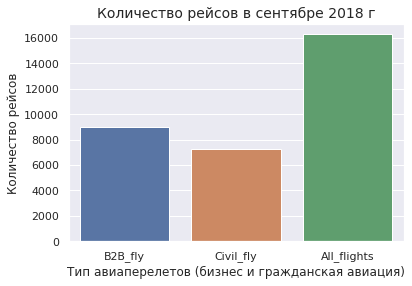

In [10]:
ax=sns.barplot(x='model', y='flights_amount', data=df_b2b_civil_plt)
ax.set_title('Количество рейсов в сентябре 2018 г', fontdict={'size': 14})
ax.set(ylabel='Количество рейсов')
ax.set(xlabel='Тип авиаперелетов (бизнес и гражданская авиация)');

Действительно можно говорить о том что два вида перелетов успешно поддерживаются компанией "F9". Количество рейсов "бизнес-джетов" больше на 20% примерно, но может это только в сентябре 2018 г.

#### Итоговые выводы по данным об авиаперевозках<a name="data_fly_final"></a>  
Данные перелетов за сентябрь 2018 года. База состоит из 8 записей в 2 столбцах: 
- `model` — модели самолетов и `flights_amount` — количество рейсов для каждой модели самолетов
- Дубликатов и пропусков не обнаружено, типы данных не требуют дополнительной обработки.

Судя по построенному графику **"Количество рейсов для каждой модели самолета в сентябре 2018 года"**, в компании "F9" чуществуют два больших направления деятельности:
- Бизнес перелеты (количество рейсов больше на 20% примерно)
- Гражданская авиация

Проведенный анализ по моделям (их характеристикам) и количеству рейсов показывает, что компания "F9" работает **преимущественно на рейсах малой и средней дальности**:
- Меньше всего рейсов у самолетов "дальней авиации" - `Boeing 767-300` - 600 рейсов и `Boeing 777-300` - 300 рейсов
- Из "гражданской авиации" компания F9 сделала ставку на `Sukhoi SuperJet-100` - 4185 рейсов - больше всего рейсов в этой категории.
- Одинаково хорошо пользуются спросом "бизнес перелеты" средней дальности с соответствующим комфортом и короткие дешевые перелеты ("авиа-такси"). Между двумя моделями, `Bombardier CRJ-200` - 4446 рейсов и `Cessna 208 Caravan` - 4557 рейсов, нагрузка распределена практически поровну.

### База данных о среднем количестве рейсов в день, прибывающих в город в агусте 2018 <a name="data_city"></a>

In [11]:
df_city = pd.read_csv('/datasets/query_3.csv') 
df_city  # проверка

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [12]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В данных записи по 101 городу, пропущенных значений нет, изменение типов данных не требуется.

In [13]:
df_city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Судя по описанию `describe` - в основном средние значения в день распеределены в пределах до 10 перелетов, но видно что есть аномально большие значения - "выбросы" по некоторым городам

In [14]:
df_city.duplicated().sum() # проверка дубликатов

0

Дубликатов не найдено

#### Результаты осмотра данных<a name="data_city_look"></a>

Данные по 101 городу России о среднем количестве рейсов, прибывающих в город за день представлены на август 2018 года
- `city` — города
- `average_flights` — среднее количество рейсов, прибывающих в город за день

Дубликатов и пропусков нет, типы данных не требуют дополнительной обработки.   
Проверка распределения данных показала наличие выбросов, что требует дополнительного анализа.

#### Подготовка данных для анализа <a name="data_city_prep"></a>

В задании сказано про количество рейсов в каждый город, либо про среднее количество рейсов либо про общее количество рейсов, поэтому будем дублировать информацию при анализе и посчитаем общее количество рейсов в каждый город

In [15]:
df_city['flights'] = df_city['average_flights'] * 31  # количество дней в августе
df_city.flights = df_city.flights.astype('int')       # меняем тип данных на целочисленный
df_city

,city,average_flights,flights
0,Абакан,3.870968,120
1,Анадырь,1.000000,31
2,Анапа,2.161290,67
3,Архангельск,5.354839,166
4,Астрахань,2.451613,76
...,...,...,...
96,Чита,1.580645,49
97,Элиста,4.870968,151
98,Южно-Сахалинск,4.290323,133
99,Якутск,2.741935,85


#### Графики количества рейсов прибывающих в город <a name="data_city_plt"></a>
Построим графики для двух типов данных для среднего количества в день и для общего количества в месяц

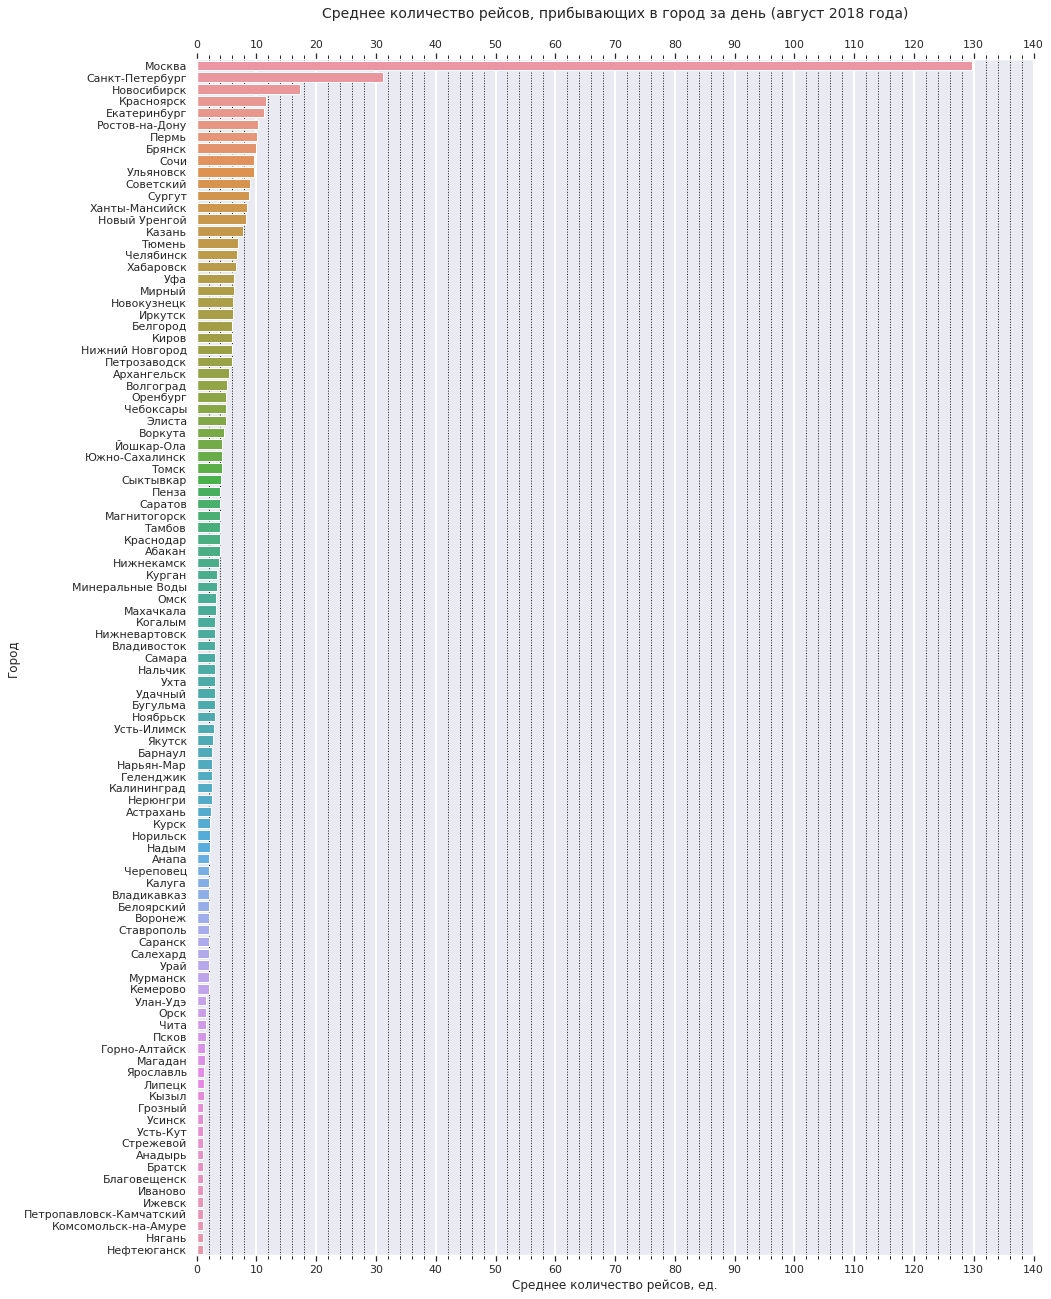

In [16]:
plt.figure(figsize=(15, 22))
ax = sns.barplot(x='average_flights', y='city', data=df_city.sort_values(
                 by='average_flights', ascending=False))
ax.set_title('Cреднее количество рейсов, прибывающих в город за день (август 2018 года)\n ',
             fontdict={'size': 14})
ax.set(ylabel='Город')
ax.set(xlabel='Среднее количество рейсов, ед.')
plt.xlim(0, 140)

# Определяем внешний вид линий основной и вспомогательной сетки:
ax.minorticks_on()
ax.grid(which='major', axis='x', linewidth=2)
ax.grid(which='minor', axis='x', color='k', linestyle=':')
# Устанавливаем шаг сетки
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

# Верхняя ось Х
ax2 = ax.twiny() 
ax2.tick_params(axis='y', which='major')
plt.xlim(0, 140)
ax2.grid(b=False)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2));

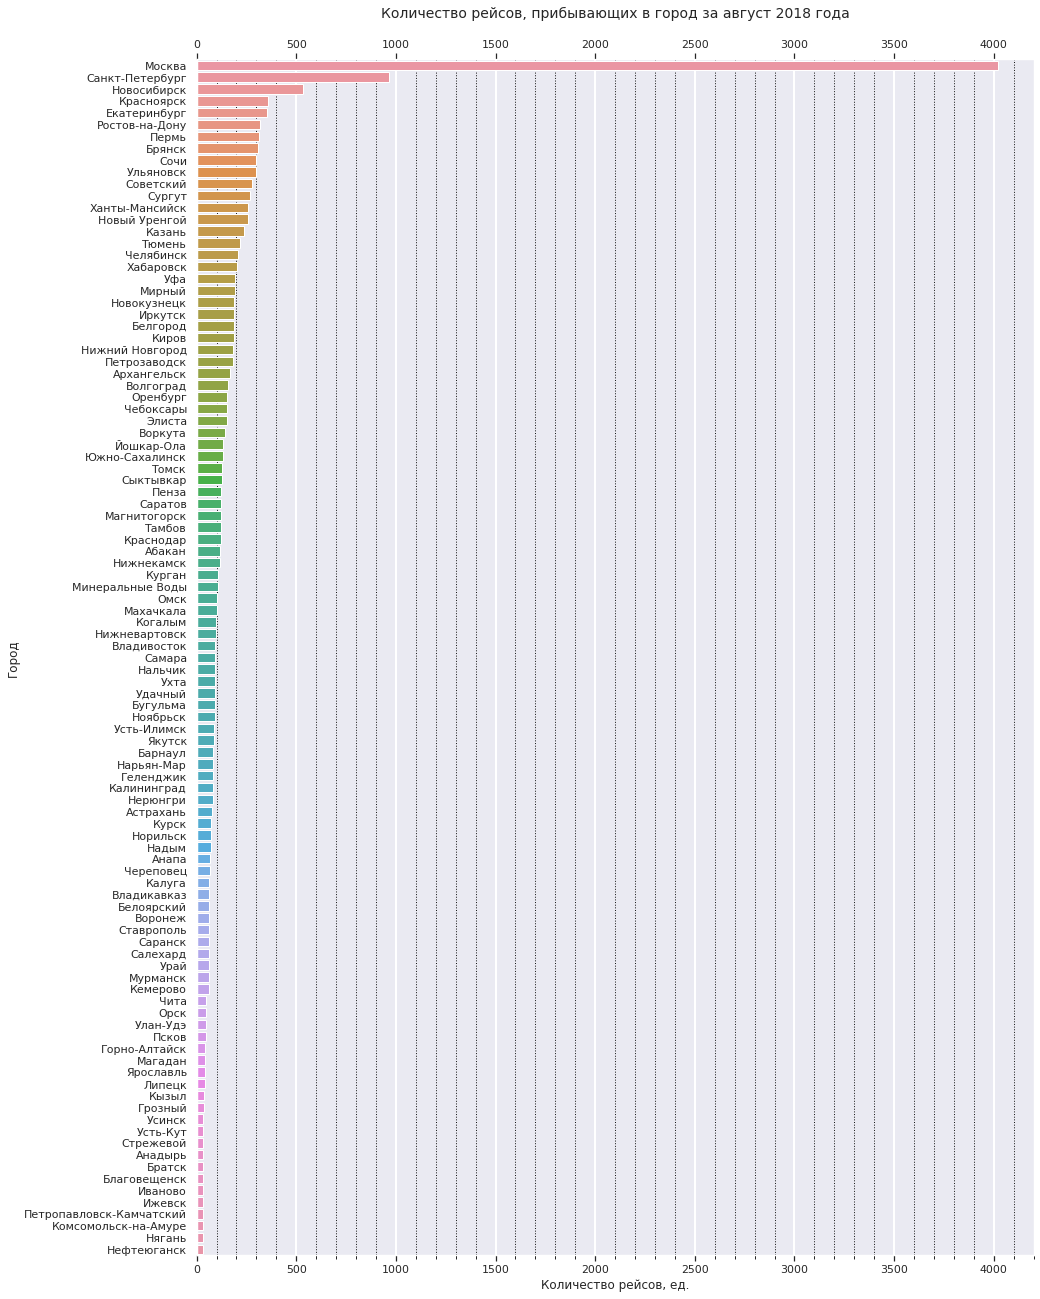

In [17]:
plt.figure(figsize=(15, 22))
ax = sns.barplot(x='flights', y='city', data=df_city.sort_values(
                 by='flights', ascending=False))
ax.set_title('Количество рейсов, прибывающих в город за август 2018 года\n ',
             fontdict={'size': 14})
ax.set(ylabel='Город')
ax.set(xlabel='Количество рейсов, ед.')
plt.xlim(0, 4200)

# Определяем внешний вид линий основной и вспомогательной сетки:
ax.minorticks_on()
ax.grid(which='major', axis='x', linewidth=2)
ax.grid(which='minor', axis='x', color='k', linestyle=':')

# Верхняя ось Х
ax2 = ax.twiny() 
ax2.tick_params(axis='y', which='major')
plt.xlim(0, 4200)
ax2.grid(b=False);

**Анализ графиков**<a name="analys_city_plt"></a>

Как и ожидалось мы обнаружили выбросы в данных - в Москву прилетает в много раз больше рейсов чем куда-либо. 130 рейсов в день это конечно не невероятно но подозрительно больше чем для других городов. Нам не известно, из данных, какой аэропорт (или город) для компании "F9" считается "домашним". Но по количеству рейсов это явно может быть Москва. Проверим количество рейсов по Москве и по другим городам. Также по этой таблице подтверждаются выводы предыдущего анализа - основной бизнес компании сосредоточен на рейсах средней дальности, а дальних рейсов выполняются буквально единицы в день.

In [18]:
# Подготовим данные для создания таблицы "Москва и другие города"
# выделим все города кроме Москвы в отдельную категорию
other_city = df_city['city'].where(df_city['city'] == 'Москва', 'Other_city')
df_city_other = df_city.pivot_table(
    index=other_city, values='flights', aggfunc='sum', margins=True, margins_name='All_flights')  # сводная таблица
df_city_other.reset_index(inplace=True)
df_city_other  # проверка

,city,flights
0,Other_city,13165
1,Москва,4022
2,All_flights,17187


Рейсов по Москве более, чем в три раза меньше по сравнению с остальными городами.

#### Графики ТОП-10 городов по количеству прибывающих рейсов<a name="top_city_plt"></a>

Подготовим данные для построение график - отсортируем исходную таблицу по убыванию и выведем первые 10 позиций

In [19]:
city_top10 = df_city.sort_values(by='average_flights', ascending=False).head(10)
city_top10

,city,average_flights,flights
43,Москва,129.774194,4022
70,Санкт-Петербург,31.161290,966
54,Новосибирск,17.322581,536
33,Красноярск,11.580645,359
20,Екатеринбург,11.322581,351
67,Ростов-на-Дону,10.193548,316
63,Пермь,10.129032,314
10,Брянск,10.000000,310
74,Сочи,9.612903,298
84,Ульяновск,9.580645,297


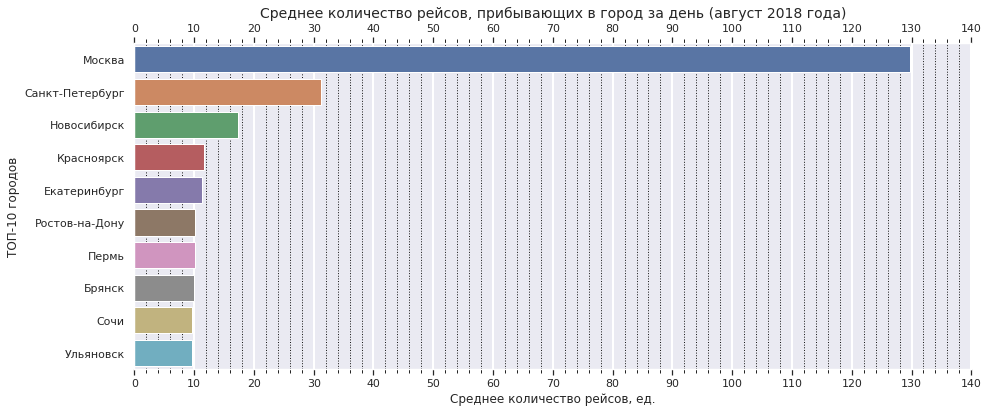

In [20]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='average_flights', y='city', data=city_top10)
ax.set_title('Cреднее количество рейсов, прибывающих в город за день (август 2018 года)',
             fontdict={'size': 14})
ax.set(ylabel='ТОП-10 городов')
ax.set(xlabel='Среднее количество рейсов, ед.')
plt.xlim(0, 140)

# Определяем внешний вид линий основной и вспомогательной сетки:
ax.minorticks_on()
ax.grid(which='major', axis='x', linewidth=2)
ax.grid(which='minor', axis='x', color='k', linestyle=':')
# Устанавливаем шаг сетки
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

# Верхняя ось Х
ax2 = ax.twiny() 
ax2.tick_params(axis='y', which='major')
plt.xlim(0, 140)
ax2.grid(b=False)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2));

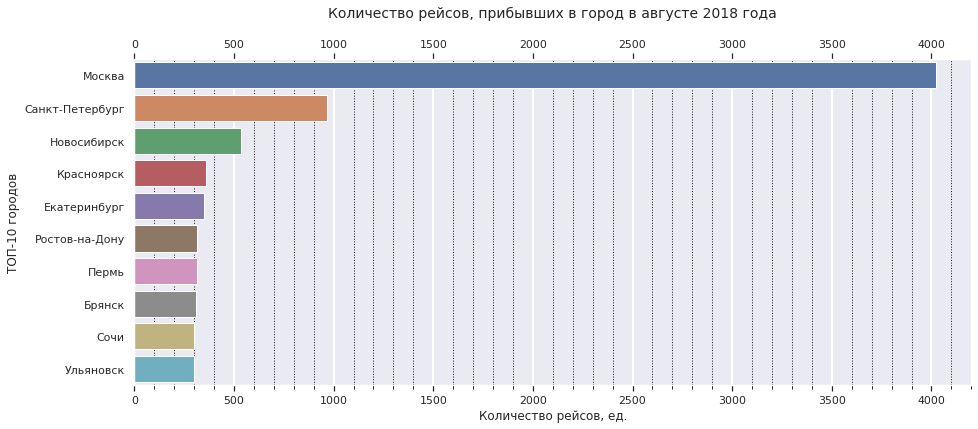

In [21]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='flights', y='city', data=city_top10)
ax.set_title('Количество рейсов, прибывших в город в августе 2018 года\n ',
             fontdict={'size': 14})
ax.set(ylabel='ТОП-10 городов')
ax.set(xlabel='Количество рейсов, ед.')
plt.xlim(0, 4200)

#  Рисуем сетку:
ax.minorticks_on()
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major', axis='x', linewidth=2)
#  Определяем внешний вид линий вспомогательной сетки:
ax.grid(which='minor', axis='x', color='k', linestyle=':')

# Верхняя ось Х
ax2 = ax.twiny() 
ax2.tick_params(axis='y', which='major')
plt.xlim(0, 4200)
ax2.grid(b=False)

**Анализ графиков**<a name="analys_top_city_plt"></a>

Ожидаемо в первую десятку вошли крупные города, промышленные центры крупных регионов и Сочи (главный курорт страны). Самые коммерческие направления. Москву можно считать "домашним" городом для компании поэтому самое количество прилетающих рейсов сосредоточено тут. Имея данные из другой части базы можно было бы определить и "родной" аэропорт для компании в Москве.

#### Итоговые выводы по данным о рейсах<a name="data_city_final"></a>
В базе представленны данные по 101 городу России о среднем количестве рейсов, прибывающих в город за день в августе 2018 года
- `city` — города
- `average_flights` — среднее количество рейсов, прибывающих в город за день   

Дубликатов и пропусков не обнаружено, типы данных не требуют дополнительной обработки. Выявленна неоднородность данных - "выбросы" в количестве рейсов в день.

Данные подготовили для анализа в двух вариантах:
- среднее количество рейсов в день 
- общее количество рейсов месяц

*Исходя из полученных данных и построенных графиков можно сказать, что:*
- "Выбросы" в данных - первая 3 города по количеству рейсов - Москва (4022), Санкт_Петербург(966), Новосибирск(536). 
- Больше всего рейсов в Москву - видимо центральный хаб для компании "F9", но это количество все равно в три раза меньше чем по всем остальным городам = 13165.
- Подтвердились выводы по предыдущей базе основной бизнес компании в части гражданских перевозок сосредоточен на рейсах малой и средней дальности, а дальних рейсов выполняются буквально единицы в день.
- В ТОП-10 вошли крупные города, промышленные центры крупных регионов и Сочи (главный курорт страны) - самые коммерческие направления.

### Заключение<a name="analys_end"></a>

Данные компании "F9" предоставленные для анализа за два периода:
- сентябрь 2018 г. - количество перелетов выполненных различными моделями самолетов
- август 2018 г. - количество рейсов прибывших в город в день (101 город по всей стране)

Данные подготовлены хорошо, дополнительной обработки не потребовалось.

Несмотря на то, что в наличии данные только за два непересекающихся периода, можно предположительно апроксимировать выводы анализа на остальное время и деятельность компании в целом, так как трудно представить себе авиакомпанию которая меняет политику деятельности раз в месяц (это просто невозможно физически). Горизонт планирования в таких масштабах не один год и не 5 лет наверное. Поэтому будем обобщать вывод исходя из этого предположения.

**Направления деятельности**  
Компания для себя выделяет два основных направления:
- Бизнес перелеты (9003 рейсов)	
- Гражданская авиация (7282 рейсов)   
- Количество бизнес-перелетов в сентябре 2018 г. было примерно на 20% больше, чем регулярных рейсов

**Количество рейсов**
- В августе и сентябре примерно одинаковое количество перелетов 17 и 16 тыс. соответсвенно.
- Меньше всего рейсов у самолетов "дальней авиации" - `Boeing 767-300`(600 рейсов) и `Boeing 777-300`(300 рейсов)
- Больше всех из регулярных рейсов летает `Sukhoi SuperJet-100`(4185 рейсов).
- Одинаково хорошо пользуются спросом "бизнес перелеты" средней дальности `Bombardier CRJ-200`(4446 рейсов) и короткие дешевые перелеты ("авиа-такси") - `Cessna 208 Caravan` (4557 рейсов).

**Города присутствия авиакомпании**
- Компания осуществляет регулярные перелеты в 101 город России.
- В ТОП-10 по количеству рейсов вошли крупные города, промышленные центры крупных регионов и Сочи (главный курорт страны) - самые коммерческие направления.
- Первые 3 города по количеству рейсов - Москва (4022), Санкт_Петербург (966), Новосибирск (536). 
- Больше всего рейсов приходится на Москву - центральный хаб для компании "F9", но остальным городам России кол-во рейсов в 3 раза больше - 13165.
- По большинству городов среднее количество рейсов в день - до 10.

**Общие выводы**
- Компания диверсифицирует бизнес - два направления представлены в перевозках - бизнес перелеты и регулярные рейсы.
- Основной бизнес компании в части гражданских перевозок сосредоточен на рейсах малой и средней дальности, а дальних рейсов выполняются буквально единицы в день. Это видно по географии полетов, по парку и загруженности самолетов компании.

**Гипотеза об увеличении количества проданных билетов на рейсы во время фестивалей**   
По проведенному анализу в тренажере, на примере выборки по количеству рейсов по Москве во время фестивалей и без них, нет возможности проверить гипотезы по критериям Стьюдента. Но судя по данным продаж в этом периоде - НЕТ определенной связи между количеством проданных билетов во время фестивалей и когда их не проводилось. 